In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy

# Nonlinear solvers: Newton method vs bisection method:
<font size="4">One needs the derivative of the original function for Newton method. Here it is given analytically. <br>
It can also be estimated with central or other differencing schemes (e.g. Secant method).<br>
For Newton method to converge, we need to be 'sufficiently' close to the root of the nonlinear equation and the function needs to be sufficiently smooth (differentiable; actually in practice often twice differentiable). Under certain conditions, the convergence is quadratic. <br>
For bisection method we only need a continuous function and a change of sign between the endpoints of the interval. However, convergence is only linear.</font>

<font size="4">Take the function $x^3$ first. Analytic root is $0$. Our starting point for Newton method is $1$.</font>

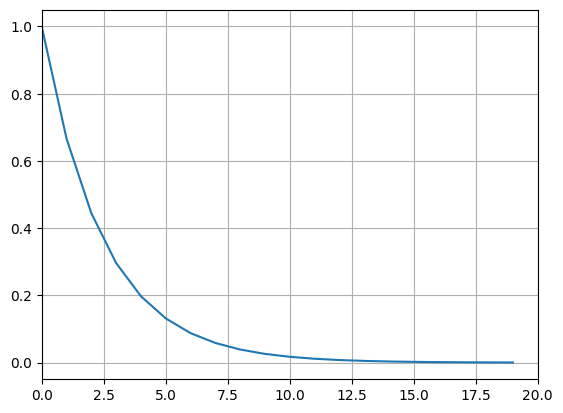

In [5]:
#Function is x^3
def f(x):
    v=x**3
    return v

#Derivative of function, here analytically
def f_deriv(x):
    dv=3*x**2
    return dv

# Array to save iteration results
x_N1=np.zeros(20)

# Initial guess
x_N1[0]=1.

# Newton method with 20 iterations
for i in np.arange(1,20):
    x_N1[i] = x_N1[i-1] - f(x_N1[i-1]) / f_deriv(x_N1[i-1])
    
# Plotting solution; analytic  root should be 0    
plt.plot(x_N1)
plt.xlim([0,20])
plt.grid()

<font size="4">In this case, convergence is relatively slow. One can observe a saddle point of the function at the root $0$ which causes the slower convergence. Shown below is the error with respect to the analytical solution for each iteration.</font>

In [79]:
# Plotting of iterations
for i in np.arange(0,20):
    print('%.52f' % np.abs(x_N1[i]-0))

1.0000000000000000000000000000000000000000000000000000
0.6666666666666667406815349750104360282421112060546875
0.4444444444444444752839729062543483451008796691894531
0.2962962962962962798485477833310142159461975097656250
0.1975308641975308532323651888873428106307983398437500
0.1316872427983539206586272030108375474810600280761719
0.0877914951989026137724181353405583649873733520507812
0.0585276634659350758482787568937055766582489013671875
0.0390184423106233815858878699600609252229332923889160
0.0260122948737489187442939453376311575993895530700684
0.0173415299158326124961959635584207717329263687133789
0.0115610199438884089090384676978828792925924062728882
0.0077073466292589395618128911280564352637156844139099
0.0051382310861726263745419274187042901758104562759399
0.0034254873907817512054818642752707091858610510826111
0.0022836582605211671812006635207126237219199538230896
0.0015224388403474444983465296843405667459592223167419
0.0010149592268982963322310197895603778306394815444946
0.00067663

<font size="4">Next, we try the function $x^3-2$. We use both bisection method and Newton method. Initial interval is $[-2,2]$ and initial guess for Newton method is 2. Analytic solution is $2^{1/3}$.</font>

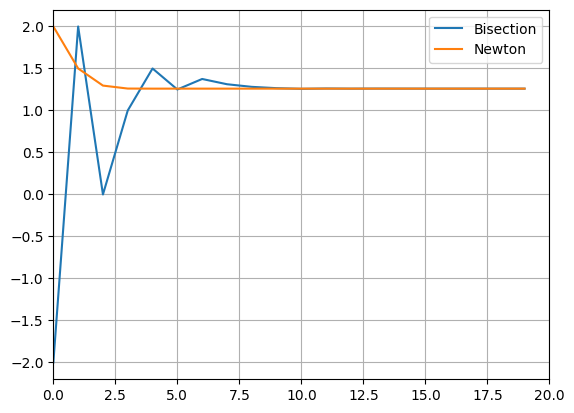

In [7]:
# Function is x^3-2
def f(x):
    v = x**3 - 2
    return v

# Derivative of function, here analytically
def f_deriv(x):
    dv = 3 * x**2
    return dv

# Array to save iteration results
x_B=np.zeros(20)

#Endpoints of initial interval for bisection method. 
x_B[0]=-2.
x_B[1]=2.
a = -2.
b = 2.

# Bisection method; One needs to first check that it works (i.e. sign change).
if(f(a)*f(b) < 0):
    for i in np.arange(2,20):
        # Bisect
        x_B[i] = (b + a) / 2.0
        # Pick the right half of the interval, so that a sign change occurs
        if (f(x_B[i]))*(f(a))<0:
            b=x_B[i]
        else:
            a=x_B[i]
        #Break off, if we found the solution; in practice, a sufficiently close solution would also work
        #e.g., np.abs(f(x_B[i]))<10**-7 or something like that
        #or the difference between two new iterations is very small, 
        #i.e. the update from one iteration to the next is smaller than some threshold
        if (f(x_B[i]))==0:
            print('Found root')
            break
else:
    print('No sign change; bisection does not work!')
    
#Netwon method; same as before:
x_N=np.zeros(20)
x_N[0]=2.
for i in np.arange(1,20):
    x_N[i]=x_N[i-1]-(f(x_N[i-1]))/(f_deriv(x_N[i-1]))

#Plotting iterations for both methods (orange: Newton, blue: bisection)
plt.plot(x_B, label='Bisection')
plt.plot(x_N, label='Newton')
plt.legend()
plt.xlim([0,20])
plt.grid()

<font size="4">Error of bisection method for each iteration. One can see a linear reduction of error. Sometimes error gets larger again, as the selection of the interval changes (left or right part of bisected interval).</font>

In [81]:
for i in np.arange(0,20):
    print('%.52f' % np.abs(x_B[i]-x_true))

3.2599210498948734127111492853146046400070190429687500
0.7400789501051268093334556397167034447193145751953125
1.2599210498948731906665443602832965552806854248046875
0.2599210498948731906665443602832965552806854248046875
0.2400789501051268093334556397167034447193145751953125
0.0099210498948731906665443602832965552806854248046875
0.1150789501051268093334556397167034447193145751953125
0.0525789501051268093334556397167034447193145751953125
0.0213289501051268093334556397167034447193145751953125
0.0057039501051268093334556397167034447193145751953125
0.0021085498948731906665443602832965552806854248046875
0.0017977001051268093334556397167034447193145751953125
0.0001554248948731906665443602832965552806854248046875
0.0008211376051268093334556397167034447193145751953125
0.0003328563551268093334556397167034447193145751953125
0.0000887157301268093334556397167034447193145751953125
0.0000333545823731906665443602832965552806854248046875
0.0000276805738768093334556397167034447193145751953125
0.00000283

<font size="4">Error of Newton method for each iteration. One can see a quadratic reduction of error. As the error gets smaller, especially below $1$, the amount of correct digits suddenly increases drastically from one iteration to the next. We need only 7 iterations (excluding the initial guess) to reach machine precision.</font>

In [82]:
for i in np.arange(0,20):
    print('%.52f' % np.abs(x_N[i]-x_true))

0.7400789501051268093334556397167034447193145751953125
0.2400789501051268093334556397167034447193145751953125
0.0363752464014230891820034230477176606655120849609375
0.0010111748468752956853222713107243180274963378906250
0.0000008106710529531824249716009944677352905273437500
0.0000000000005215827769688985426910221576690673828125
0.0000000000000000000000000000000000000000000000000000
0.0000000000000000000000000000000000000000000000000000
0.0000000000000000000000000000000000000000000000000000
0.0000000000000000000000000000000000000000000000000000
0.0000000000000000000000000000000000000000000000000000
0.0000000000000000000000000000000000000000000000000000
0.0000000000000000000000000000000000000000000000000000
0.0000000000000000000000000000000000000000000000000000
0.0000000000000000000000000000000000000000000000000000
0.0000000000000000000000000000000000000000000000000000
0.0000000000000000000000000000000000000000000000000000
0.0000000000000000000000000000000000000000000000000000
0.00000000

# Nonlinear solver, 2D-Newton method (can be extended to any higher dimension):
<font size="4">Application of the Newton Method to the function $f(x,y)=(x^2-64, x+y^3)^T$. One needs the Jacobian matrix (i.e. matrix of partial derivatives) for this. Here it is given analytically. <br>
Similar as for the 1D case, it can also be estimated with central or other differencing schemes.<br>
For Newton method to converge, we need to be 'sufficiently' close to the root of the nonlinear equation and the function needs to be sufficiently smooth (differentiable).<br>
If it converges and certain conditions hold, the convergence is quadratic.</font>

In [83]:
#Function (x^2-64, x+y^3)
def f(x):
    v=[x[0]**2-64.,x[0]+x[1]**3]
    return v
#Derivative of function, here analytically
def f_deriv(x):
    dv=[[2*x[0], 0],[1,3.*x[1]**2]]
    return dv
#Starting point and iteration
x=np.array([1.,-2.])
x_o=np.array([0.,0.])
i=1

#Do Newton iteration until the difference between successive steps is <=10^-4
while (np.linalg.norm(x-x_o)>10**-4):
    x_o=x
    fu=f(x)
    dfu=f_deriv(x)
    in_dfu=np.linalg.inv(dfu)
    x=x-in_dfu.dot(fu)
    i+=1
print('Solution estimate is ', x, ' after ', i, ' iterations ' )

('Solution estimate is ', array([ 8., -2.]), ' after ', 8, ' iterations ')
